- toc: false
- branch: master
- badges: true
- comments: true
- categories: [bert, nlp]
- image: 
- hide: true
- search_exclude: true
- metadata_key1: transformer
- metadata_key2: nlp

# News representation from pretrained Sentence-BERT

Pre-requisites:  
- Transformer (`pip install transformers`)
- MulticoreTSNE (`pip install MulticoreTSNE`)



In [23]:
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from matplotlib import pyplot as plt
from typing import List

from MulticoreTSNE import MulticoreTSNE as TSNE
from transformers import AutoTokenizer, AutoModel
from torch.nn import functional as F



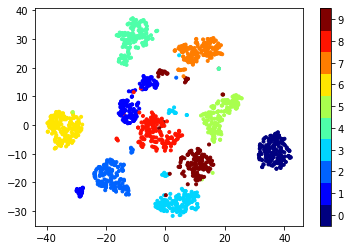

In [24]:
#hide
%matplotlib inline
from sklearn.datasets import load_digits
from MulticoreTSNE import MulticoreTSNE as TSNE
from matplotlib import pyplot as plt

digits = load_digits()
embeddings = TSNE(n_jobs=4).fit_transform(digits.data)
vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]
plt.scatter(vis_x, vis_y, c=digits.target, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

## Text representation

In [25]:
tokenizer = AutoTokenizer.from_pretrained('deepset/sentence_bert')
model = AutoModel.from_pretrained('deepset/sentence_bert')

def get_representation(texts: List[str]):
    inputs = tokenizer.batch_encode_plus(texts,
                                     return_tensors='pt',
                                     pad_to_max_length=True)
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']
    output = model(input_ids, attention_mask=attention_mask)[0]
    sentence_rep = output.mean(dim=1)
    return sentence_rep


## Visualize embedding

In [26]:
def plot_embedding(embedding, label=[], input_tensor=True, n_jobs=4):
    
    nar_embed = embedding.detach().numpy()
    reduced_embed = TSNE(n_jobs).fit_transform(nar_embed)
    vis_x = reduced_embed[:, 0]
    vis_y = reduced_embed[:, 1]
    plt.scatter(vis_x, vis_y,  marker='.')
    
    # annotate with labels
    if label != []:
        i = 0
        for x,y in zip(vis_x, vis_y):

            alabel = label[i]

            plt.annotate(alabel, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center

            i += 1

    plt.show()
    

In [27]:
# Example courtesy: https://github.com/UKPLab/sentence-transformers

# Corpus with example sentences
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'The girl is carrying a baby.',
          'A man is riding a horse.',
          'A woman is playing violin.',
          'Two men pushed carts through the woods.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'A cheetah is running behind its prey.'
          ]

# Query sentences:
queries = ['A man is eating pasta.', 'Someone in a gorilla costume is playing a set of drums.', 'A cheetah chases prey on across a field.']


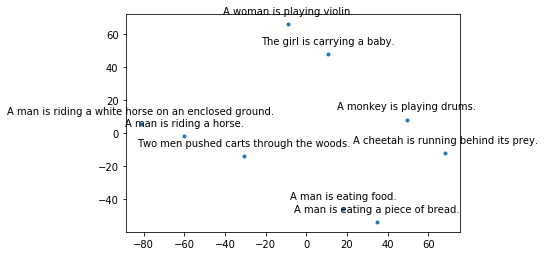

In [28]:
encodings = get_representation(corpus)
plot_embedding(encodings, corpus)

In [29]:
# Finding similarity of corpus[0] with corpus[1:]

similarities = F.cosine_similarity(encodings[:1], encodings[1:])
closest = similarities.argsort(descending=True)
for ind in closest:
    print(f'label: {corpus[ind+1]} \t similarity: {similarities[ind]}')

label: A man is eating a piece of bread. 	 similarity: 0.6846261024475098
label: Two men pushed carts through the woods. 	 similarity: 0.23186245560646057
label: A man is riding a horse. 	 similarity: 0.2130296677350998
label: A man is riding a white horse on an enclosed ground. 	 similarity: 0.19911333918571472
label: A monkey is playing drums. 	 similarity: 0.06138730049133301
label: A cheetah is running behind its prey. 	 similarity: -0.07709454745054245
label: A woman is playing violin. 	 similarity: -0.11077538132667542
label: The girl is carrying a baby. 	 similarity: -0.1298864632844925


## News embedding

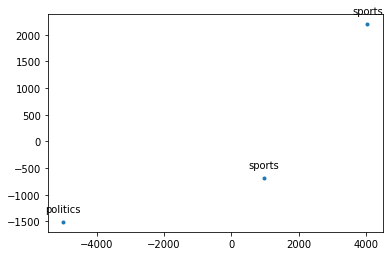

In [30]:
news = [{
    
    "sports" : """
    The NBA has confirmed there will be no games for a third straight day but the play-offs will resume on Saturday.

A host of US sports games were postponed after the Milwaukee Bucks chose not to play on Wednesday in protest at the shooting of Jacob Blake.

Blake, a black man, was shot seven times in the back by police on Sunday in Kenosha, Wisconsin, near Milwaukee.

The WNBA has said it will resume play on Friday having postponed all its games the previous two days.

Sportshour podcast: The week the sporting world took action
NBA commissioner Adam Silver and Michele Roberts, executive director of the players' association NBPA, released a joint statement on Friday, saying there had been "a candid, impassioned and productive conversation yesterday between NBA players, coaches and team governors regarding next steps to further our collective efforts and actions in support of social justice and racial equality".

It added "all parties agreed to resume" play-off games on Saturday provided "the league together with the players will work to enact the following commitments":

The NBA and its players have agreed to immediately establish a social justice coalition, with representatives from players, coaches and governors.
In every city where the league franchise owns and controls the arena property, team governors will continue to work with local elections officials to convert the facility into a voting location for the 2020 general election to allow for a safe in-person voting option for communities vulnerable to Covid.
The league will work with the players and network partners to create and include advertising spots in each NBA play-off game dedicated to promoting greater civic engagement in national and local elections and raising awareness around voter access and opportunity.
Game five of the Bucks' series with Orlando Magic has been rescheduled for 20:30 BST on Saturday, followed by Oklahoma City Thunder's game with Houston Rockets and Los Angeles Lakers' fixture with Portland Trail Blazers.

Sunday's games begin with Boston Celtics facing Toronto Raptors at 18:00 BST, before LA Clippers play Dallas Mavericks and Utah Jazz take on Denver Nuggets.
    """,
    },

    {
        "politics": """
        Activists in Montreal have pulled down a statue of Canada's first prime minister Sir John A MacDonald, who was linked to cruel policies that killed many indigenous people in the late 19th Century.

Video captured the moment the statue's head flew off and bounced on the pavement nearby.

Quebec's head of government condemned it as "unacceptable".

"Destroying parts of our history is not the solution," said François Legault.

No arrests have been made, according to Canadian broadcaster CBC.

MacDonald was prime minister of Canada for 19 years in the 1860s-1890s and is remembered for his nation-building policies but he also created the residential schools system.

For more than a century the system forcibly removed at least 150,000 indigenous children from their homes and sent them to state-funded boarding schools. Many children were abused and some died, and they were were forbidden from speaking their own language or practising their culture.

A government report in 2015 called the practice "cultural genocide".

He was accused of allowing famine and disease to kill many indigenous people and his government forced some First Nation communities to leave their traditional territories, withholding food until they did so.
        
        """
    },
    
    {
        "sports": """
        Alexander Kristoff timed his sprint finish to perfection to win the opening stage of the Tour de France in Nice.

After a large group crashed inside the final 3km, Norwegian Kristoff, 33, surged home in a sprint also involving Ireland's Sam Bennett, who was fourth.

Rain made the roads treacherous and led to several crashes, with Pavel Sivakov of Team Ineos twice coming off.

Ineos' defending champion Egan Bernal largely avoided the trouble and finished safely in the peloton.

Colombia's Nairo Quintana crashed, while Astana's decision to up the pace on the final descent from Levens saw Miguel Angel Lopez slide into a road sign and prompted some stern exchanges towards the team from other riders in the peloton.

Ineos' Luke Rowe called Astana's move "pretty stupid".

"I have to say 'chapeau' to the whole peloton - minus Astana to hit it down one climb and, as a result, their leader was left on his back," the British rider said.

France's Julian Alaphilippe was also caught in a crash, while compatriot Thibaut Pinot - one of the race favourites - fell heavily towards the end and rolled over the line with a ripped jersey.

However, because the crash happened inside the final 3km, he was credited with the same time as the group he was riding with, so ended up losing no time on his rivals for the overall win.

The riders face a 186km mountainous second stage on Sunday, with two climbs above 1,500m.
        """
    }

]

news_embedding = get_representation([n[list(n.keys())[0]] for n in news])
plot_embedding(news_embedding, label = [list(n.keys())[0] for n in news])

Reference:  

- [t-sne embed and tensorboard visualization](https://github.com/joeddav/blog/blob/master/_notebooks/2020-05-29-ZSL.ipynb)  
- [Text classification in Pytorch](https://towardsdatascience.com/bert-text-classification-using-pytorch-723dfb8b6b5b)  
- [Notebook on sentence-bert](https://github.com/joeddav/blog/blob/master/_notebooks/2020-05-29-ZSL.ipynb)
